In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("student_performance_new.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment          54 non-null     int64  
 15  Unnamed: 15         54 non-null     int64  
 16  Assignment

In [6]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [7]:
df['Compensatory'] = df['Compensatory'].fillna(df['Compensatory'].mean())

In [8]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          0
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [9]:
x = df.drop(['Result','USN','STUDENT NAME','Sl.No.'],axis=1)
y = df['Result']

In [11]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
pred = model.predict(x_test)

In [15]:
print("Accuracy:", accuracy_score(y_test,pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))
print("classification_report:", classification_report(y_test,pred))

Accuracy: 0.8235294117647058
Confusion matrix
 [[6 3]
 [0 8]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.73      1.00      0.84         8

    accuracy                           0.82        17
   macro avg       0.86      0.83      0.82        17
weighted avg       0.87      0.82      0.82        17



[Text(0.6, 0.9166666666666666, 'Test Total  <= 24.333\ngini = 0.5\nsamples = 37\nvalue = [18, 19]\nclass = Fail'),
 Text(0.4, 0.75, 'Test III <= 16.5\ngini = 0.245\nsamples = 21\nvalue = [18, 3]\nclass = Pass'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Pass'),
 Text(0.6, 0.5833333333333334, 'Test I  <= 19.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Pass'),
 Text(0.4, 0.4166666666666667, 'Quiz <= 15.75\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Pass'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Pass'),
 Text(0.6, 0.25, 'Quiz 2 <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Pass'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Pass'),
 Text(0.8, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Fail'),
 Text(0.8, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Fail'),
 Text(0.8, 0.75, 'gini = 0.0\nsamples = 16\nvalu

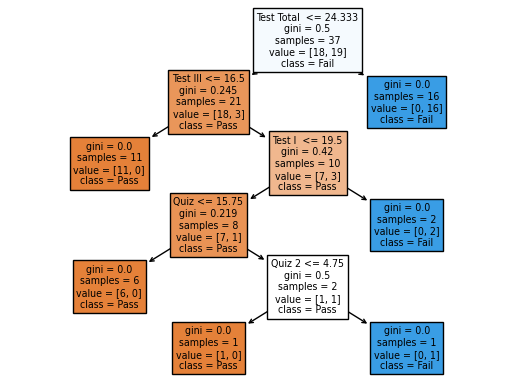

In [17]:
plot_tree(model, feature_names=x.columns.tolist(),class_names=['Pass','Fail'],filled=True)